## Homework 6 - Group 1
### Iwan Pasveer, Flavia Leotta, Noah Frinking, Dylan Gavron

Python version (3.12.6)


### Required libraries

In [70]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

### Homework 6.1

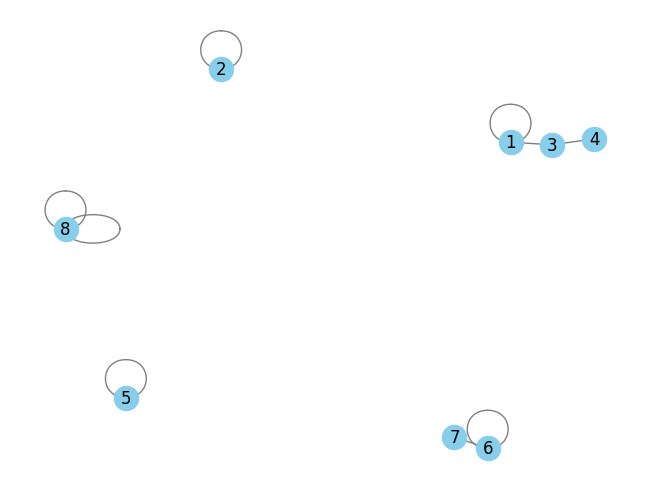

In [71]:
def Link_Stub_Reconnection(degree_seq):
    # The function takes a list as argument, introducing a condition
    if isinstance(degree_seq, list) and sum(degree_seq) % 2 == 0:
        # Initializing an empty graph, using MultiGraph to accept multiple edges
        G = nx.MultiGraph()
        stubs = []

        # Adding nodes to the graph and stubs to the stubs list
        for i in range(1, len(degree_seq)+1):
            G.add_node(i)
            stubs.extend([i]* degree_seq[i-1])

            # Creating random connections between stubs
            while len(stubs) >= 2:
                stub1 = random.choice(stubs)
                stubs.remove(stub1)
                stub2 = random.choice(stubs)
                stubs.remove(stub2)

                G.add_edge(stub1, stub2)

        return G
    else:
        print("Input should be a valid list of degrees with an even sum")


# Example, seed = 5 and a random degree sequence
random.seed(5)
degree_seq = [3,2,2,1,2,3,1,4]
G = Link_Stub_Reconnection(degree_seq)
nx.draw(G, with_labels = True, node_color='skyblue', edge_color='gray', pos = nx.spring_layout(G))
plt.show()

### Homework 6.2
This uses a Fisher-Yates shuffle (notice the random.shuffle(stubs))
This makes the algorithm faster, the explanation can be found on "CN_HW6_Group1.pdf".

In [72]:
def Link_Stub_Reconnection_shuffle(degree_seq):
    # As before, condition on the degree sequence list
    if isinstance(degree_seq, list) and sum(degree_seq) % 2 == 0:
        # Initializing
        G = nx.MultiGraph()
        stubs = []
        
        # Adding nodes and stubs
        for k in range(1, len(degree_seq)+1):
            G.add_node(k)
            stubs.extend([k]*degree_seq[k-1])
        
        # Randomly shuffling the stubs in the list
        random.shuffle(stubs)

        # Connecting the last two stubs in the list
        while len(stubs) >= 2:
            v1 = stubs.pop()
            v2 = stubs.pop()
            G.add_edge(v1,v2)
        
        return G

    else:
        return print("Input should be a valid list of degrees")

### Homework 6.3

In [73]:
# Inizialize degree sequences
k1 = [2,2,2,2,2,2,2,2,2,2,2,2]
k2 = [7,4,2,1,1,1,1,1,1,1,1,1]

# Creating a function to count self loops
def count_self_loops(graph):
    count = 0 
    for node in list(graph.nodes):
        count += graph.number_of_edges(node,node)
    return count

# Creating a function to count multiple edges
def count_multiple_edges(graph):
    count = 0 
    for node1 in list(graph.nodes):
        for node2 in list(graph.nodes):
            if node1 < node2:
                edges = graph.number_of_edges(node1, node2)
                if edges > 1:
                    count += (edges - 1)
    return count

# Keeping track of the number of self loops and multiple edges
tot_self_loops_k1 = []
tot_multiple_edges_k1 = []
tot_self_loops_k2 = []
tot_multiple_edges_k2 = []

# Seed
random.seed(5)

# List of 60 randomly generated seeds
seeds = random_seeds = random.sample(range(0, 10000), 60)

# Random generating graphs (using a different seed for each graph)
for i in seeds:
    random.seed(i)
    G1 = Link_Stub_Reconnection_shuffle(k1)
    G2 = Link_Stub_Reconnection_shuffle(k2)

    self_1 = count_self_loops(G1)
    self_2 = count_self_loops(G2)
    multiple_1 = count_multiple_edges(G1)
    multiple_2 = count_multiple_edges(G2)

    tot_self_loops_k1.append(self_1)
    tot_multiple_edges_k1.append(multiple_1)
    tot_self_loops_k2.append(self_2)
    tot_multiple_edges_k2.append(multiple_2)


########## Info for k1 ##########
average_self_k1 = round(sum(tot_self_loops_k1)/len(tot_self_loops_k1),3) if tot_self_loops_k1 else 0
average_multiple_k1 = round(sum(tot_multiple_edges_k1)/len(tot_multiple_edges_k1),3) if tot_multiple_edges_k1 else 0
#################################

########## Info for k2 ##########
average_self_k2 = round(sum(tot_self_loops_k2)/len(tot_self_loops_k2),3) if tot_self_loops_k2 else 0
average_multiple_k2 = round(sum(tot_multiple_edges_k2)/len(tot_multiple_edges_k2),3) if tot_multiple_edges_k2 else 0
#################################

# Average counts
print(f"""
Average count of self loops for k1: {average_self_k1}
Average count of mutiple edges for k1: {average_multiple_k1}
Average count of self loops for k2: {average_self_k2}
Average count of mutiple edges for k2: {average_multiple_k2}""")


Average count of self loops for k1: 0.3
Average count of mutiple edges for k1: 0.267
Average count of self loops for k2: 1.15
Average count of mutiple edges for k2: 0.717


### Homework 6.4
Important! This function returns a tuple containing the graph and the total amount of attempts to create it.

In [74]:
# This function takes degree_seq as an argument, and keeps track on the attempts
def repeated_configuration_model(degree_seq, attempt = 1):
    # As before, condition on the argument
    if isinstance(degree_seq, list) and sum(degree_seq) % 2 == 0:
        G = nx.MultiGraph()
        stubs = []
        
        # Adding nodes and stubs
        for k in range(1, len(degree_seq)+1):
            G.add_node(k)
            stubs.extend([k]*degree_seq[k-1])
        
        # Shuffling the stubs list
        random.shuffle(stubs)

        # Connecting stubs
        while len(stubs) >= 2:
            v1 = stubs.pop()
            v2 = stubs.pop()
            G.add_edge(v1,v2)
        
        # Counting how many self loops and multiple edges are formed
        self_loops = count_self_loops(G)
        multiple_edges = count_multiple_edges(G)

        # If there are either self loops or multiple edges...
        if self_loops > 0 or multiple_edges > 0:
            # ...the function re-calls itself, adding one attempt to the total count
            return repeated_configuration_model(degree_seq, attempt + 1)
        
        # If there aren't, the function returns a tuple containing the graph and the amount of attempts
        return G, attempt

    else:
        return print("Input should be a valid list of degrees")

# Rewriting the degree sequences    
k1 = [2,2,2,2,2,2,2,2,2,2,2,2]
k2 = [7,4,2,1,1,1,1,1,1,1,1,1]

# Keeping track of the attempts 
k1_attempts = []
k2_attempts = []

# Seed
random.seed(5)

# List of 30 randomly generated seeds
seeds = random_seeds = random.sample(range(0, 10000), 60)

for i in seeds:
    random.seed(i)
    G1, attempt1 = repeated_configuration_model(k1)
    G2, attempt2 = repeated_configuration_model(k2)

    k1_attempts.append(attempt1)
    k2_attempts.append(attempt2)

# Averaging the attempts
k1_average = round(sum(k1_attempts)/len(k1_attempts),3)
k2_average = round(sum(k2_attempts)/len(k2_attempts),3)

print(f"""
Average number of attempts k1: {k1_average}
Average number of attempta k2: {k2_average}""")


Average number of attempts k1: 1.85
Average number of attempta k2: 40.733


### Homework 6.5

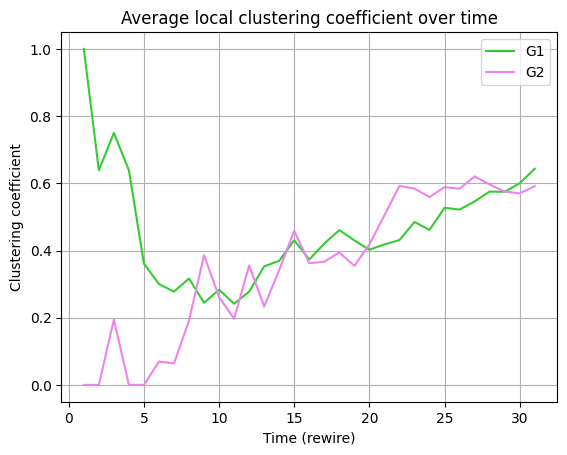

In [75]:
def local_rewiring(G, rewires = 30):
    rewire = 1

    # Initializes the list of average clustering coefficients by calculating it for the original graph
    coefficients = [nx.average_clustering(G)]

    while rewire <= rewires:
        # Randomly picks an edge in the graph
        v1, v2 = random.choice(list(G.edges()))
        
        # Creates a list of other possible edges, minus the ones that already include v1 and v2, to avoid self loops
        possible_edges = [edge for edge in G.edges() if v1 not in edge and v2 not in edge]
        
        # Chooses another random edge from the possible ones
        if possible_edges:
            v3, v4 = random.choice(possible_edges)

        # Removes the original edge and creates new ones between the 2 original vertices and the newly selected ones
        if not G.has_edge(v1,v4) and not G.has_edge(v2,v3):
            G.remove_edge(v1, v2)
            G.add_edge(v1, v4)
            G.add_edge(v2, v3)
            coefficients.append(nx.average_clustering(G))
            rewire += 1
    
    # Returns a list of average clustering coefficients
    return G, coefficients

########################### Creating the graphs in figure 6.6 ############################
G1 = nx.Graph()
G2 = nx.Graph()
G1_edges = [(1,2),(1,3),(2,3),(4,5),(4,6),(5,6),(7,8),(7,9),(8,9),(10,11),(10,12),(11,12)]
G2_edges = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,1)]

for node in range(1, 13):
    G1.add_node(node)
    G2.add_node(node)

G1.add_edges_from(G1_edges)
G2.add_edges_from(G2_edges)
###########################################################################################

# Seed set to 5
random.seed(5)

# Applying yhr local rewiring algorithm
G1_new, clust_coeff_1 = local_rewiring(G1)
G2_new, clust_coeff_2 = local_rewiring(G2)

# Plotting of the clustering coefficients
x_values = [n for n in range(1,len(clust_coeff_1)+1)]
plt.plot(x_values, clust_coeff_1, color = 'limegreen', label = "G1")
plt.plot(x_values, clust_coeff_2, color = 'violet', label ="G2")

plt.xlabel("Time (rewire)")
plt.ylabel("Clustering coefficient")
plt.title("Average local clustering coefficient over time")
plt.legend()
plt.grid(True)

plt.show()

### Homework 6.6.1

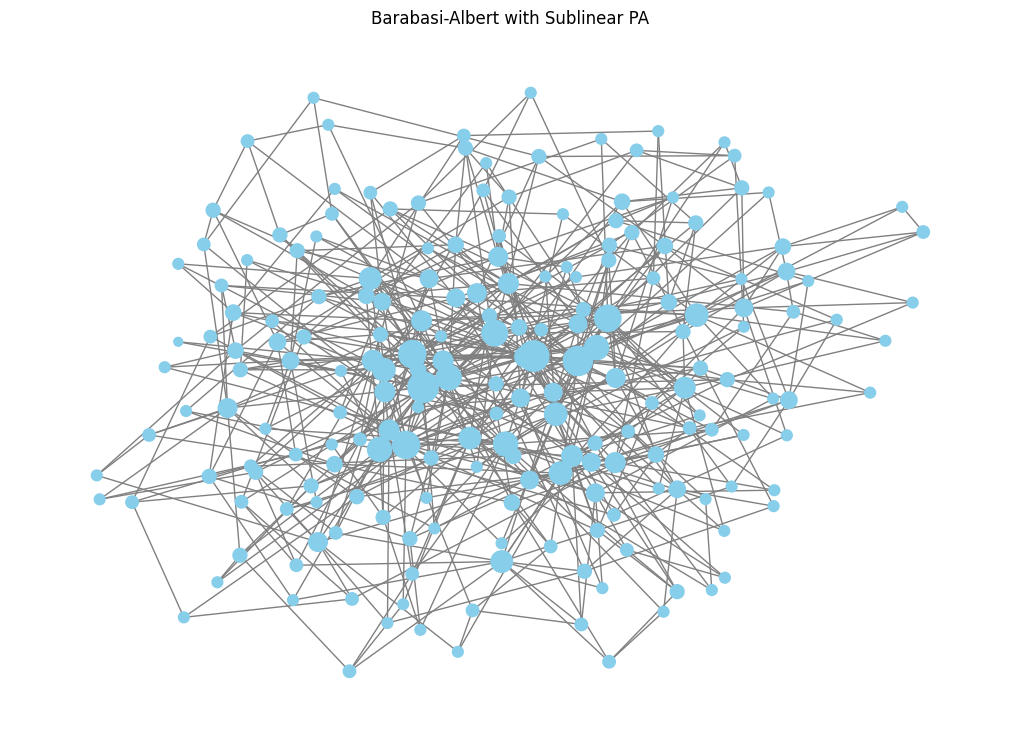

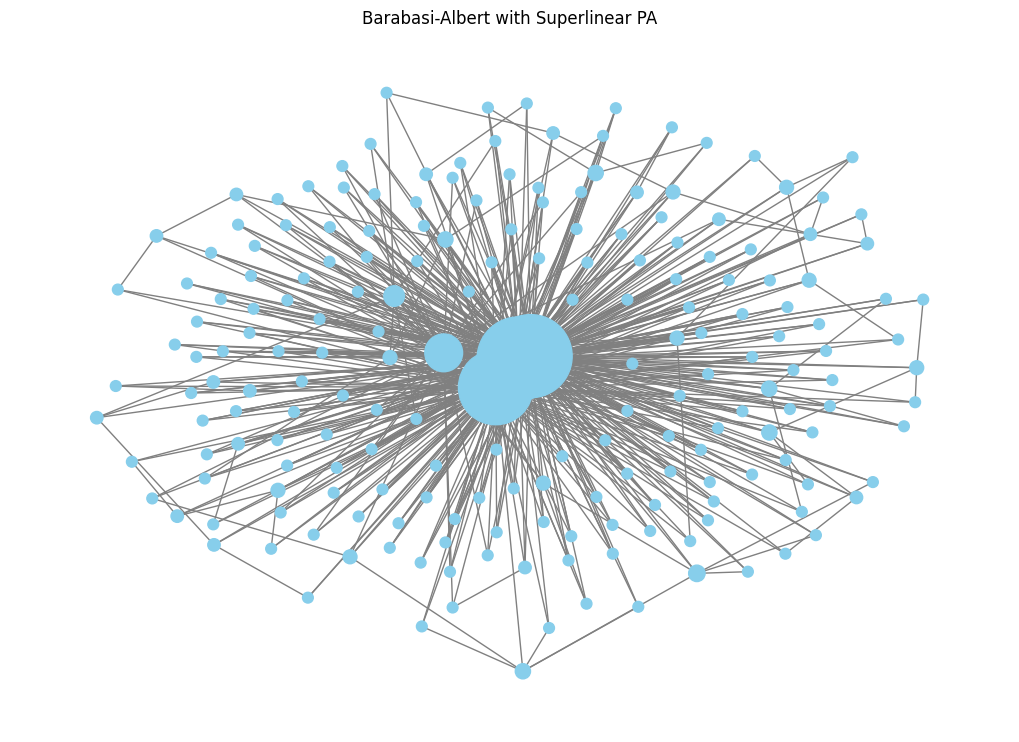

In [76]:
def BA_sublinear_PA(N, m0, m):
    np.random.seed(3)
    
    # Initializing an empty adjacency matrix
    adj_matrix = np.zeros((N, N))
    
    # Connecting all nodes in the network
    for i in range(m0 - 1):
        for j in range(i + 1, m0):
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1

    # Adding new nodes
    for new_node in range(m0, N):
        degree = np.sum(adj_matrix[:new_node, :new_node], axis=1)
        probabilities = np.power(degree, 0.5) / np.sum(np.power(degree, 0.5))

        selected_nodes = np.random.choice(range(new_node), size=m, p=probabilities)
        
        for node in selected_nodes:
            adj_matrix[new_node, node] = 1
            adj_matrix[node, new_node] = 1
    
    return adj_matrix


def BA_superlinear_PA(N, m0, m):
    np.random.seed(3)

    # Initializing an empty adjacency matrix
    adj_matrix = np.zeros((N, N))
    
    # Connecting all nodes in the network
    for i in range(m0 - 1):
        for j in range(i + 1, m0):
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1
    
    # Adding new nodes
    for new_node in range(m0, N):
        degree = np.sum(adj_matrix[:new_node, :new_node], axis=1)
        probabilities = np.power(degree, 2)  / np.sum(np.power(degree, 2))
        
        selected_nodes = np.random.choice(range(new_node), size=m, p=probabilities, replace=False)
        
        for node in selected_nodes:
            adj_matrix[new_node, node] = 1
            adj_matrix[node, new_node] = 1
    
    return adj_matrix


# Parameters for test networks
N = 200
m0 = 5
m = 3

# Sublinear BA model
sublinear_adj_matrix = BA_sublinear_PA(N, m0, m)
G_sublinear = nx.from_numpy_array(sublinear_adj_matrix)

# Superlinear BA model
superlinear_adj_matrix = BA_superlinear_PA(N, m0, m)
G_superlinear = nx.from_numpy_array(superlinear_adj_matrix)

# Plotting the sublinear and superlinear models
def plot_graph(G, title):
    deg = np.array([d for n, d in G.degree()])
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=deg * 20, node_color='skyblue', edge_color='gray')
    plt.title(title)
    plt.show()

plot_graph(G_sublinear, "Barabasi-Albert with Sublinear PA")
plot_graph(G_superlinear, "Barabasi-Albert with Superlinear PA")

### Homework 6.6.2

C:\Users\flavi\AppData\Local\Temp\ipykernel_32684\3122705366.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(unique_deg, deg_freq, "ro", color = color, label = label) # code to make a scatterplot


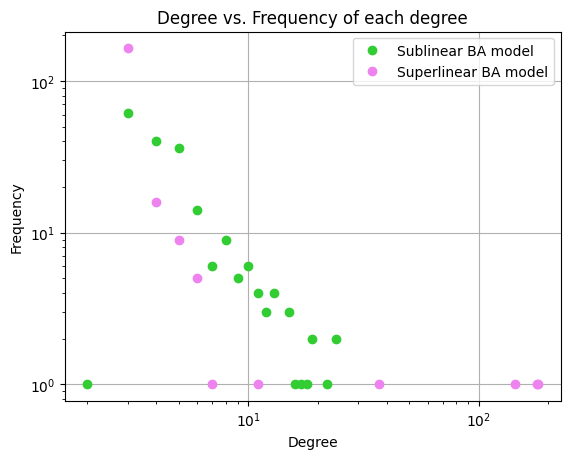

([2.5649493574615367, 2.8903717578961645, 3.1780538303479458, 3.091042453358316, 2.9444389791664403, 2.3978952727983707, 1.6094379124341003, 2.772588722239781, 1.3862943611198906, 2.0794415416798357, 2.70805020110221, 2.302585092994046, 2.833213344056216, 1.791759469228055, 2.4849066497880004, 1.9459101490553132, 2.1972245773362196, 1.0986122886681098, 0.6931471805599453], [1.3862943611198906, 0.0, 0.6931471805599453, 0.0, 0.6931471805599453, 1.3862943611198906, 3.58351893845611, 0.0, 3.6888794541139363, 2.1972245773362196, 1.0986122886681098, 1.791759469228055, 0.0, 2.6390573296152584, 1.0986122886681098, 1.791759469228055, 1.6094379124341003, 4.110873864173311, 0.0])
([3.6109179126442243, 5.198497031265826, 5.187385805840755, 4.969813299576001, 2.3978952727983707, 1.0986122886681098, 1.6094379124341003, 1.791759469228055, 1.9459101490553132, 1.3862943611198906], [0.0, 0.0, 0.0, 0.0, 0.0, 5.099866427824199, 2.1972245773362196, 1.6094379124341003, 0.0, 2.772588722239781])


In [77]:
def plot_degree_dist(G, label, color):
    degrees = [G.degree(n) for n in G.nodes()]
    freq=collections.Counter(degrees) #compute unique degrees and their frequencies
    unique_deg=freq.keys()
    deg_freq=freq.values()
    plt.plot(unique_deg, deg_freq, "ro", color = color, label = label) # code to make a scatterplot
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")


plot_degree_dist(G_sublinear, label= f'Sublinear BA model', color = 'limegreen')
plot_degree_dist(G_superlinear, label= f'Superlinear BA model', color = 'violet')
plt.title("Degree vs. Frequency of each degree")
plt.legend()
plt.grid(True)
plt.show()